# TP2

In [1]:
#%pip install numpy pandas matplotlib scikit-learn torch

In [2]:
import Utils as ut
import Models
import Train
import numpy as np
from Utils import Timer
from Models import Cluster
from Preprocesses import Preprocesses

Lecture fichier

In [3]:
df_hiseq = ut.read_csv()
df_ecg = ut.read_ecg()

## Prétraitement

In [4]:
clean = Preprocesses(df_hiseq)
df_hiseq =clean.drop('Class')

df_hiseq_acp = clean.pca()


## Clustering
La segmentation des données sans ACP en utilisant les techniques de KMeans, DBSCAN et spectral Cluster avec leur affichage.

### KMeans

Temps d'exécution kmeans: 2.9125 secondes
Mémoire actuelle : 0.24 MB
Pic mémoire : 263.46 MB
Temps d'exécution KMEANS - ACP: 0.0145 secondes
Mémoire actuelle : 0.01 MB
Pic mémoire : 1.35 MB


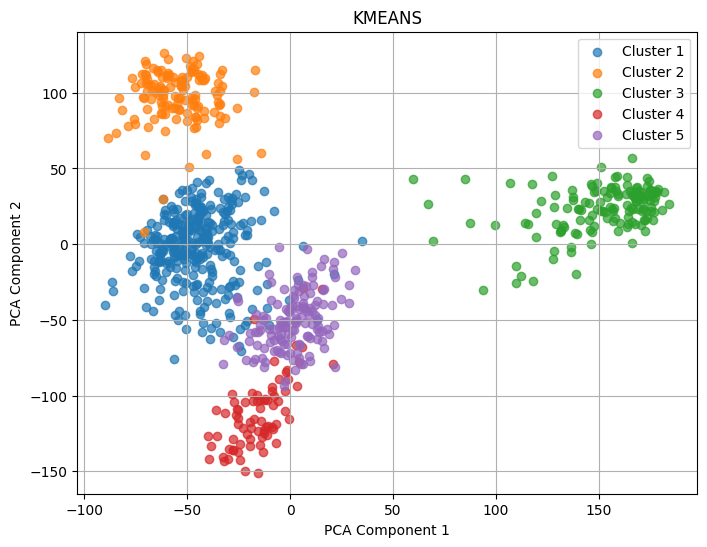

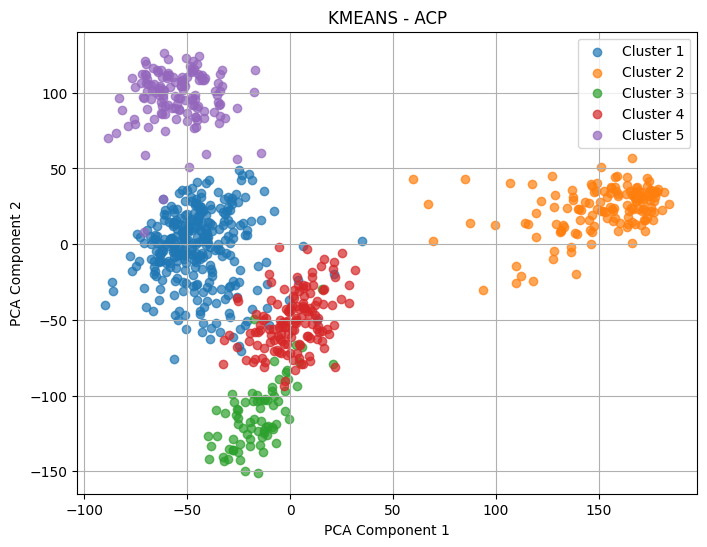

Méthode: KMeans
Silhouette Score:  0.22488527683456977
Davies-Bouldin Index:  1.8312963835948153
Indice de Calinski-Harabasz:  124.90109519428106

Méthode: KMEANS - ACP
Silhouette Score:  0.3080967941158415
Davies-Bouldin Index:  1.4354198520825694
Indice de Calinski-Harabasz:  198.46524051560158



In [5]:
cluster_hiseq = Cluster(df_hiseq)
cluster_hiseq_acp = Cluster(df_hiseq_acp)

for _ in range(1):
    memory = ut.Memory()
    timer = Timer()
    label_kmeans = cluster_hiseq.Kmeans()
    timer.stop('kmeans')
    memory.stop()

    memory = ut.Memory()
    time = Timer()
    label_kmeans_acp = cluster_hiseq_acp.Kmeans()
    time.stop('KMEANS - ACP')
    memory.stop()
    
    # Affichage
    ut.plot_clusters(df_hiseq,label_kmeans, 'KMEANS')
    ut.plot_clusters(df_hiseq,label_kmeans_acp, 'KMEANS - ACP')

    # Évalusation
    ut.evaluate_cluster_interne(df_hiseq,label_kmeans, "KMeans")
    ut.evaluate_cluster_interne(df_hiseq_acp,label_kmeans_acp, 'KMEANS - ACP')


### DBSCAN

Temps d'exécution DBSCAN: 1.4257 secondes
Mémoire actuelle : 0.02 MB
Pic mémoire : 305.87 MB
Temps d'exécution DBSCAN - ACP: 0.0156 secondes
Mémoire actuelle : 0.01 MB
Pic mémoire : 1.86 MB


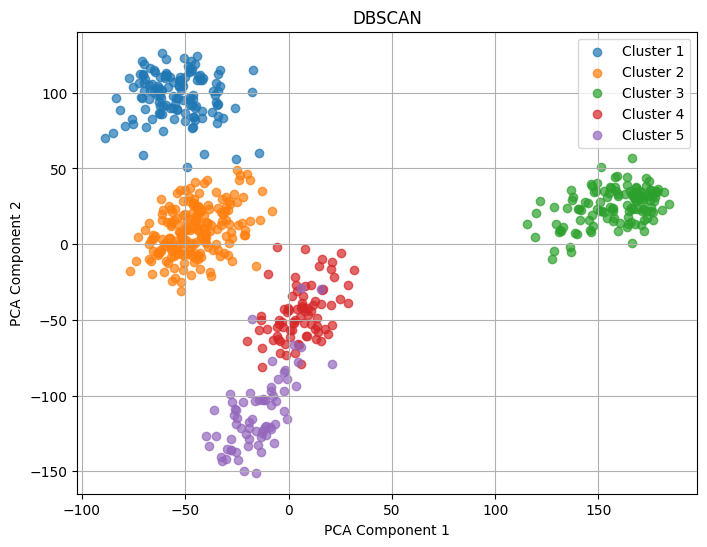

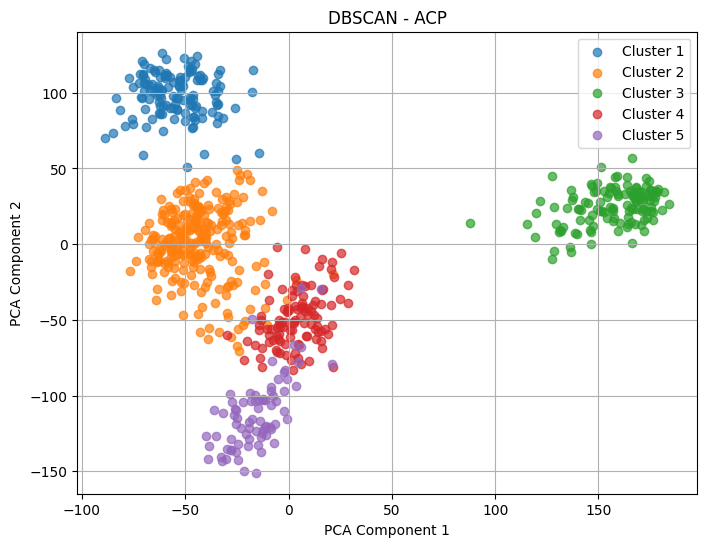

Méthode: DBSCAN
Silhouette Score:  0.15175359459804
Davies-Bouldin Index:  2.6383960867534846
Indice de Calinski-Harabasz:  76.75117604152015

Méthode: DBSCAN - ACP
Silhouette Score:  0.2777199236601016
Davies-Bouldin Index:  2.414612302612919
Indice de Calinski-Harabasz:  150.39317526861274



In [6]:
for _ in range(1):

    memory = ut.Memory()
    timer = Timer()
    label_dbscan = cluster_hiseq.dbscan(175)
    timer.stop('DBSCAN')
    memory.stop()

    memory = ut.Memory()
    time = Timer()
    label_dbscan_acp = cluster_hiseq_acp.dbscan(125)
    time.stop('DBSCAN - ACP')
    memory.stop()

    # Affichage
    ut.plot_clusters(df_hiseq,label_dbscan, 'DBSCAN')
    ut.plot_clusters(df_hiseq,label_dbscan_acp, 'DBSCAN - ACP')

    # Évalusation
    ut.evaluate_cluster_interne(df_hiseq,label_dbscan, "DBSCAN")
    ut.evaluate_cluster_interne(df_hiseq_acp,label_dbscan_acp, 'DBSCAN - ACP')


### Spectral Clustering

Temps d'exécution Spectral Clustering: 1.2271 secondes
Mémoire actuelle : 0.06 MB
Pic mémoire : 131.75 MB
Temps d'exécution Spectral Clustering - ACP: 0.1244 secondes
Mémoire actuelle : 0.02 MB
Pic mémoire : 0.82 MB


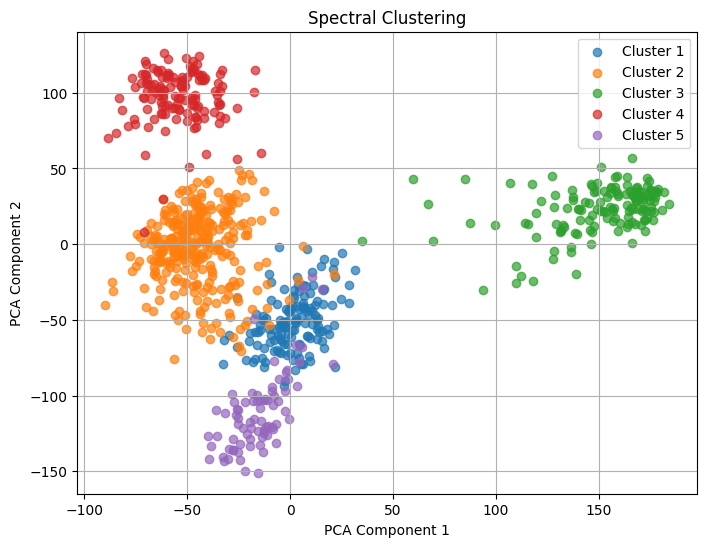

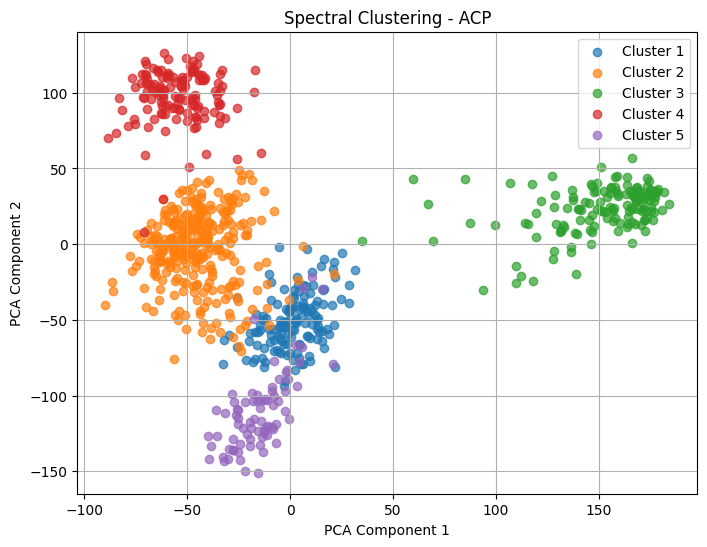

Méthode: Spectral Clustering
Silhouette Score:  0.22441563217214042
Davies-Bouldin Index:  1.8308319539842466
Indice de Calinski-Harabasz:  124.59130172918402

Méthode: Spectral Clustering - ACP
Silhouette Score:  0.3077318037487971
Davies-Bouldin Index:  1.432609275548161
Indice de Calinski-Harabasz:  197.86226830726116



In [7]:
for _ in range(1):

    memory = ut.Memory()
    timer = Timer()
    label_sc = cluster_hiseq.SpectralCluster()
    timer.stop('Spectral Clustering')
    memory.stop()

    memory = ut.Memory()
    time = Timer()
    label_sc_acp = cluster_hiseq_acp.SpectralCluster()
    time.stop('Spectral Clustering - ACP')
    memory.stop()

    # Affichage
    ut.plot_clusters(df_hiseq,label_sc, 'Spectral Clustering')
    ut.plot_clusters(df_hiseq,label_sc_acp, 'Spectral Clustering - ACP')

    # Évalusation
    ut.evaluate_cluster_interne(df_hiseq,label_sc, 'Spectral Clustering')
    ut.evaluate_cluster_interne(df_hiseq_acp,label_sc_acp, 'Spectral Clustering - ACP')





In [8]:
##Algo isolation forest
model = Models.IF(100)

model.train(df_ecg[:,:-1])
labels = model.predict(df_ecg[:,:-1])

##Algo auto-encodeur

##Classic
classic_trainer = Train.Trainer(df_ecg)
classic_model = Models.AE(df_ecg[1].size -1)
classic_trainer.train_autoencoder(classic_model, epochs=100)


classic_scores_test_data = classic_trainer.anomaly_score(classic_model, on='test')
classic_scores_validation_data = classic_trainer.anomaly_score(classic_model, on='validation')

classic_threshold_test_data = np.percentile(classic_scores_test_data, 80)
classic_pred_test_data = (classic_scores_test_data > classic_threshold_test_data).astype(int)

classic_threshold_validation_data = np.percentile(classic_scores_validation_data, 80)
classic_pred_validation_data = (classic_scores_validation_data > classic_threshold_validation_data).astype(int)


In [9]:
pred = (labels == -1).astype(int)

ut.evaluate_anomalie(df_ecg[:,-1], pred, 'Isolation Forest')
ut.evaluate_anomalie(classic_trainer.test[:,-1], classic_pred_test_data, 'Classic auto-encoder - test')
ut.evaluate_anomalie(classic_trainer.validation[:,-1], classic_pred_validation_data, 'Classic auto-encoder - Validation')

Méthode: Isolation Forest
Exactitude:  0.5684273709483794
Rappel:  0.9170948955121617
Précision:  0.5829703832752613
F1-score:  0.7128211955798163
ROC-AUC:  0.4979894871981203

Méthode: Classic auto-encoder - test
Exactitude:  0.37897227856659904
Rappel:  0.2334047109207709
Précision:  0.9206081081081081
F1-score:  0.37239494362828834
ROC-AUC:  0.5789816492003533

Méthode: Classic auto-encoder - Validation
Exactitude:  0.41866330390920553
Rappel:  0.24143835616438356
Précision:  0.8867924528301887
F1-score:  0.3795423956931359
ROC-AUC:  0.577656977125254



In [10]:
trainer = Train.Trainer(df_ecg)
model = Models.VAE(df_ecg[1].size -1)
trainer.train_autoencoder(model, epochs=100)


scores_test_data = trainer.anomaly_score(model, on='test')
scores_validation_data = trainer.anomaly_score(model, on='validation')

threshold_test_data = np.percentile(scores_test_data, 80)
pred_test_data = (scores_test_data > threshold_test_data).astype(int)

threshold_validation_data = np.percentile(scores_validation_data, 80)
pred_validation_data = (scores_validation_data > threshold_validation_data).astype(int)

In [11]:
ut.evaluate_anomalie(trainer.test[:,-1], pred_test_data, 'Classic auto-encoder - test')
ut.evaluate_anomalie(trainer.validation[:,-1], pred_validation_data, 'Classic auto-encoder - Validation')

Méthode: Classic auto-encoder - test
Exactitude:  0.3742393509127789
Rappel:  0.230406852248394
Précision:  0.9087837837837838
F1-score:  0.3676118893064571
ROC-AUC:  0.571864742336075

Méthode: Classic auto-encoder - Validation
Exactitude:  0.42370744010088274
Rappel:  0.24486301369863014
Précision:  0.89937106918239
F1-score:  0.38492597577388965
ROC-AUC:  0.5841539948875927

